## PART 3 - DETECTION OF UNUSUAL MARKET BEHAVIOR







### METHOD - SELF ORGANIZING MAPS - DEEP LEARNING TECHNIQUE TO DETECT UNUSUAL BEHAVIOR IN THE STOCK MARKET 

### Step 1 - Import libraries and data

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
%matplotlib inline 

In [11]:
# Importing the dataset
# Give the training dataset path and the columns to be extracted from it 
symbol = 'AAPL_indicators'
data_path = "/Users/aishwaryagunasekar/Desktop/Prep/Stock_Market_Project/Final_stock_project/Data/" + str(symbol) + ".csv"
dataset = pd.read_csv(data_path)

In [12]:
dataset.shape

(1510, 8)

In [13]:
dataset.head()

,Date,Close,Volume,MA7,MA21,MA60,MACD,EMA
0,2013-01-02,78.432854,140129500,74.660203,76.123333,81.852952,0.000000,78.432854
1,2013-01-03,77.442856,88241300,75.124897,75.823401,81.556047,-0.022211,77.690356
2,2013-01-04,75.285713,148583400,75.264284,75.491088,81.257024,-0.095195,76.025603
3,2013-01-07,74.842857,121039100,75.486734,75.389795,80.984952,-0.142045,75.227249
4,2013-01-08,75.044289,114676800,75.695917,75.240612,80.721762,-0.156497,75.104772


### Step 2 - Data Preparation

In [15]:
#Drop unnecessary columns 
som_dataset = dataset.drop(['Date', 'MA7','MA21','MA60','MACD','EMA'], axis=1)

#Re assign index 
som_dataset = som_dataset.reset_index()
X = som_dataset.iloc[:, :].values

som_dataset.head()

,index,Close,Volume
0,0,78.432854,140129500
1,1,77.442856,88241300
2,2,75.285713,148583400
3,3,74.842857,121039100
4,4,75.044289,114676800


In [16]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.00000000e+00, 1.28448220e-01, 3.63698248e-01],
       [6.62690524e-04, 1.22832166e-01, 2.17012517e-01],
       [1.32538105e-03, 1.10595140e-01, 3.87597064e-01],
       ...,
       [9.98674619e-01, 5.69321475e-01, 1.17717899e-01],
       [9.99337309e-01, 5.69775310e-01, 8.71141062e-02],
       [1.00000000e+00, 5.78341278e-01, 6.65115232e-02]])

### Step 3 - SOM Implementation 

#### Technique Explanation

The customers (each row observation) are the inputs to the SOM. 

These input points are going to be mapped to an output space. 

We have a neural network composed of neurons between this input space and output space. 

Each neuron will be initialized with the as a vector of weights whose number = same as the vector size of a customer. 

Now, for each observation (for each customer), a neuron will be picked that the customer is the closest to. 

This neuron is called the winning node. The winning node is the most similar neuron to the observation (customer). 

We can use Gaussian Neighbourhood function to update the weights of the neighbours of the winning node to move them closer to the point. 

We do this for all the observations and we repeat it many times. 

Each time , the output space dimension keeps decreasing and stops at a point.  

In [27]:
som = MiniSom(x = 10, y = 10, input_len = 3, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Step 4 - Visualization

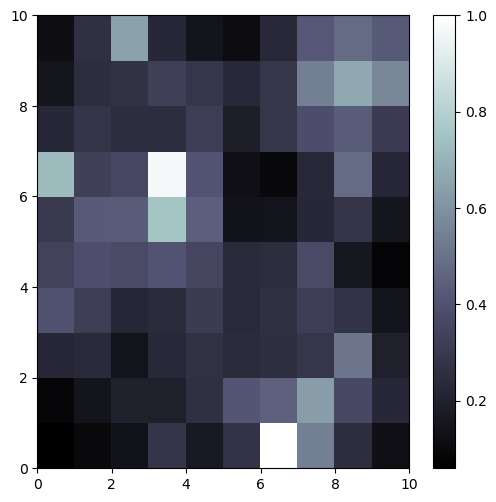

In [28]:
# Visualizing the results

plt.figure(figsize=(6, 6), dpi=100)
bone()
pcolor(som.distance_map().T)
colorbar()
plt.show()

In [29]:
mappings = som.win_map(X)

print(np.shape(mappings[(7,1)]))

unusual_observations2 = mappings[(7,1)]

(61, 3)


In [30]:
# Finding the frauds
#mappings = som.win_map(X)
unusual_observations2 = sc.inverse_transform(unusual_observations2)

pd.DataFrame(unusual_observations2)

,0,1,2
0,725.0,113.690002,27616900.0
1,1037.0,135.020004,33226200.0
2,1038.0,135.509995,35623100.0
3,1039.0,135.350006,22584600.0
4,1040.0,135.720001,22198200.0
5,1041.0,136.699997,24507200.0
6,1042.0,137.110001,20836900.0
7,1043.0,136.529999,20788200.0
8,1044.0,136.660004,21776600.0
9,1045.0,136.929993,20257400.0


In [31]:
unusual_portion2 = som_dataset.iloc[1000:1100, 0:3].values

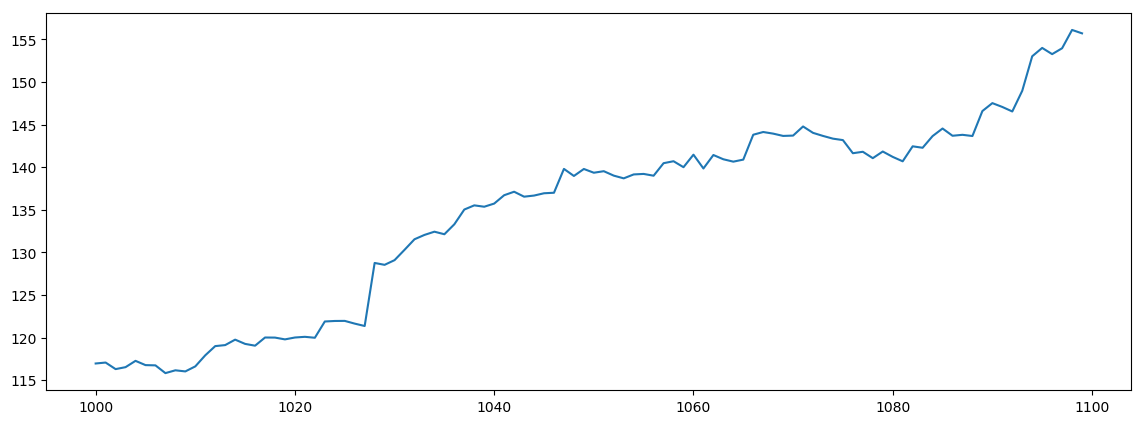

In [32]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(pd.DataFrame(unusual_portion2)[0],pd.DataFrame(unusual_portion2)[1])

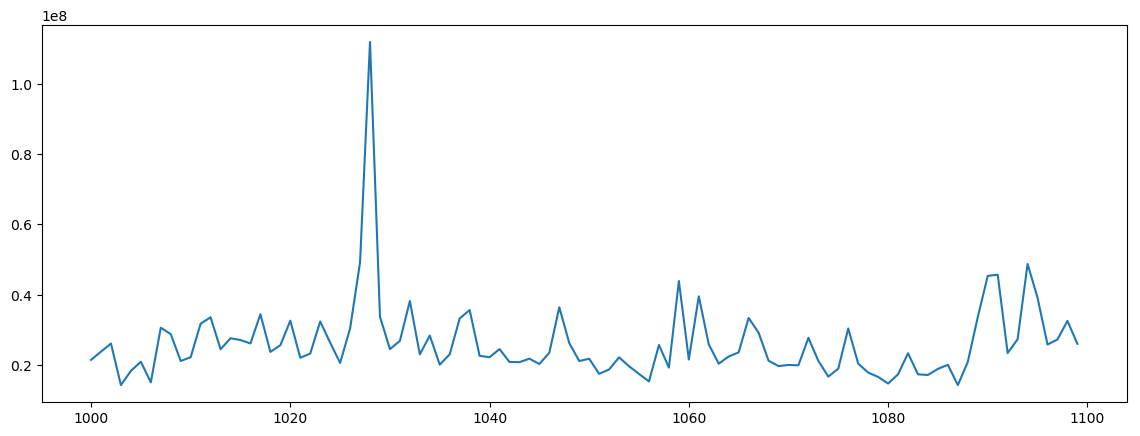

In [33]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(pd.DataFrame(unusual_portion2)[0],pd.DataFrame(unusual_portion2)[2])